In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeRegressor   
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

#Evalution
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
df=pd.read_csv("E:/DEPI/regression_data.csv", header=None)
print(df.shape)
df.head()

(1460, 81)


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   int64  
 1   1       1460 non-null   int64  
 2   2       1460 non-null   object 
 3   3       1201 non-null   float64
 4   4       1460 non-null   int64  
 5   5       1460 non-null   object 
 6   6       91 non-null     object 
 7   7       1460 non-null   object 
 8   8       1460 non-null   object 
 9   9       1460 non-null   object 
 10  10      1460 non-null   object 
 11  11      1460 non-null   object 
 12  12      1460 non-null   object 
 13  13      1460 non-null   object 
 14  14      1460 non-null   object 
 15  15      1460 non-null   object 
 16  16      1460 non-null   object 
 17  17      1460 non-null   int64  
 18  18      1460 non-null   int64  
 19  19      1460 non-null   int64  
 20  20      1460 non-null   int64  
 21  21      1460 non-null   object 
 22  

In [4]:
df.drop(columns=[0,6, 25, 57, 72, 73, 74], inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1460 non-null   int64  
 1   2       1460 non-null   object 
 2   3       1201 non-null   float64
 3   4       1460 non-null   int64  
 4   5       1460 non-null   object 
 5   7       1460 non-null   object 
 6   8       1460 non-null   object 
 7   9       1460 non-null   object 
 8   10      1460 non-null   object 
 9   11      1460 non-null   object 
 10  12      1460 non-null   object 
 11  13      1460 non-null   object 
 12  14      1460 non-null   object 
 13  15      1460 non-null   object 
 14  16      1460 non-null   object 
 15  17      1460 non-null   int64  
 16  18      1460 non-null   int64  
 17  19      1460 non-null   int64  
 18  20      1460 non-null   int64  
 19  21      1460 non-null   object 
 20  22      1460 non-null   object 
 21  23      1460 non-null   object 
 22  

In [6]:
missing_cols = df.columns[df.isnull().sum() > 0]
print(missing_cols.tolist())

[3, 26, 30, 31, 32, 33, 35, 42, 58, 59, 60, 63, 64]


In [7]:
for col in df.columns:
    if df[col].dtype in ['object', 'category']:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
    elif df[col].dtype in ['int64', 'float64']:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)



In [8]:
df.describe()

,1,3,4,17,18,19,20,26,34,36,...,66,67,68,69,70,71,75,76,77,80
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1460 non-null   int64  
 1   2       1460 non-null   object 
 2   3       1460 non-null   float64
 3   4       1460 non-null   int64  
 4   5       1460 non-null   object 
 5   7       1460 non-null   object 
 6   8       1460 non-null   object 
 7   9       1460 non-null   object 
 8   10      1460 non-null   object 
 9   11      1460 non-null   object 
 10  12      1460 non-null   object 
 11  13      1460 non-null   object 
 12  14      1460 non-null   object 
 13  15      1460 non-null   object 
 14  16      1460 non-null   object 
 15  17      1460 non-null   int64  
 16  18      1460 non-null   int64  
 17  19      1460 non-null   int64  
 18  20      1460 non-null   int64  
 19  21      1460 non-null   object 
 20  22      1460 non-null   object 
 21  23      1460 non-null   object 
 22  

In [10]:
df[df.select_dtypes(include='int64').columns] = df.select_dtypes(include='int64').astype('float64')


In [11]:
object_cols = df.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
df.head()

,1,2,3,4,5,7,8,9,10,11,...,68,69,70,71,75,76,77,78,79,80
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1460 non-null   float64
 1   2       1460 non-null   int32  
 2   3       1460 non-null   float64
 3   4       1460 non-null   float64
 4   5       1460 non-null   int32  
 5   7       1460 non-null   int32  
 6   8       1460 non-null   int32  
 7   9       1460 non-null   int32  
 8   10      1460 non-null   int32  
 9   11      1460 non-null   int32  
 10  12      1460 non-null   int32  
 11  13      1460 non-null   int32  
 12  14      1460 non-null   int32  
 13  15      1460 non-null   int32  
 14  16      1460 non-null   int32  
 15  17      1460 non-null   float64
 16  18      1460 non-null   float64
 17  19      1460 non-null   float64
 18  20      1460 non-null   float64
 19  21      1460 non-null   int32  
 20  22      1460 non-null   int32  
 21  23      1460 non-null   int32  
 22  

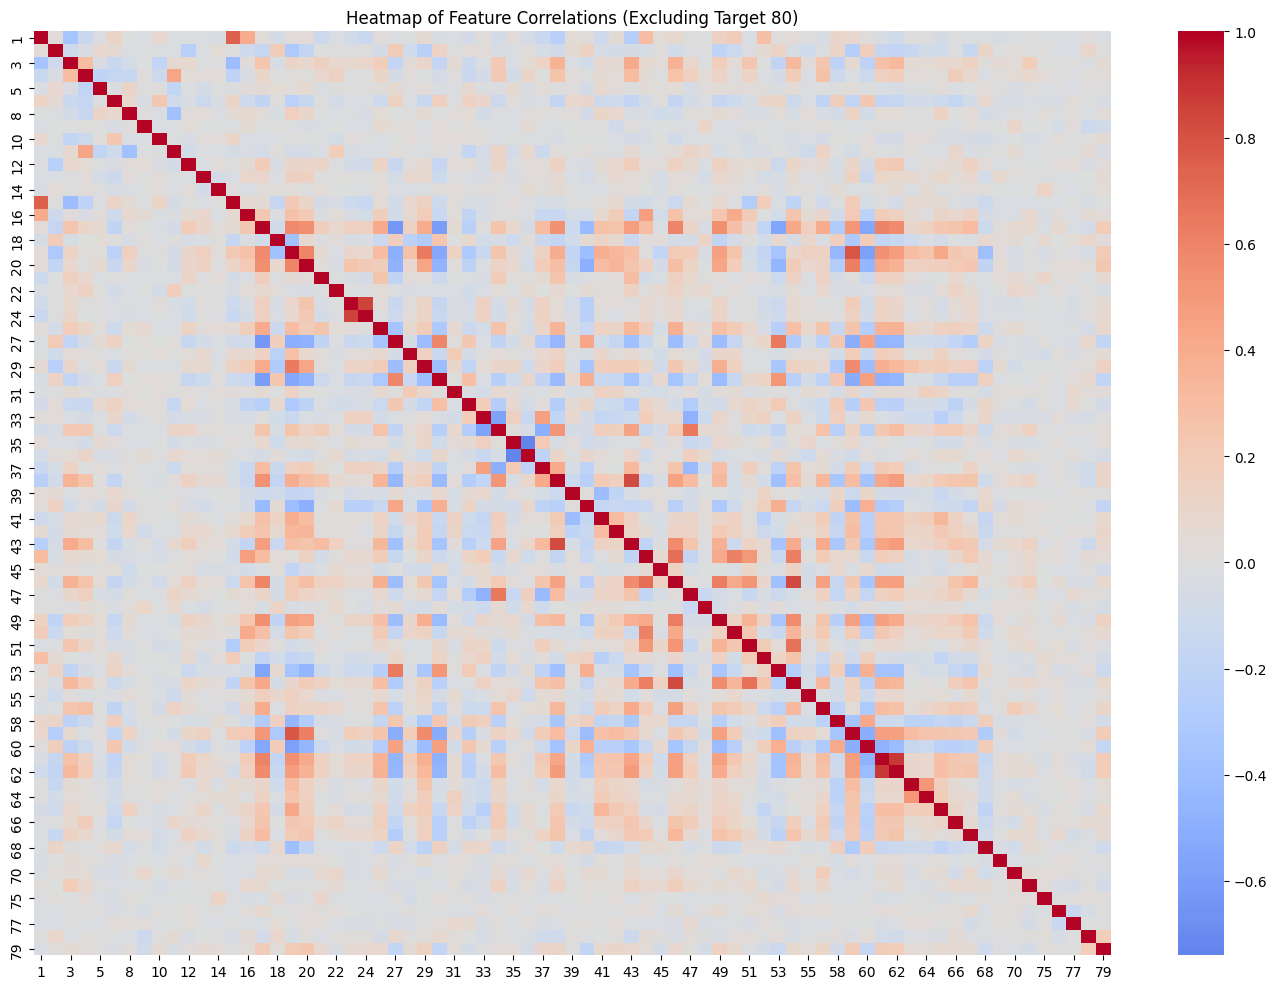

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

corr_no_target = corr.drop(index=80, columns=80)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_no_target, cmap='coolwarm', center=0)
plt.title("Heatmap of Feature Correlations (Excluding Target 80)")
plt.tight_layout()
plt.show()

upper_triangle = corr_no_target.where(np.triu(np.ones(corr_no_target.shape), k=1).astype(bool))
high_corr_pairs = [(col, row) for col in upper_triangle.columns for row in upper_triangle.index
                   if abs(upper_triangle.loc[row, col]) >= 0.7]

to_drop = set()
for col1, col2 in high_corr_pairs:
    if col1 not in to_drop and col2 not in to_drop:
        to_drop.add(col2)

df.drop(columns=to_drop, inplace=True)


In [15]:
df.head()

,2,3,4,5,7,8,9,10,11,12,...,68,69,70,71,75,76,77,78,79,80
0,3,65.0,8450.0,1,3,3,0,4,0,5,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,3,80.0,9600.0,1,3,3,0,2,0,24,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,3,68.0,11250.0,1,0,3,0,4,0,5,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,3,60.0,9550.0,1,0,3,0,0,0,6,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,3,84.0,14260.0,1,0,3,0,2,0,15,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_cols = [col for col in numeric_cols if col != 80]

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

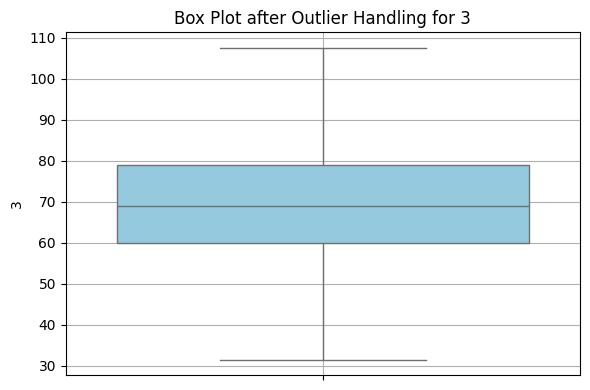

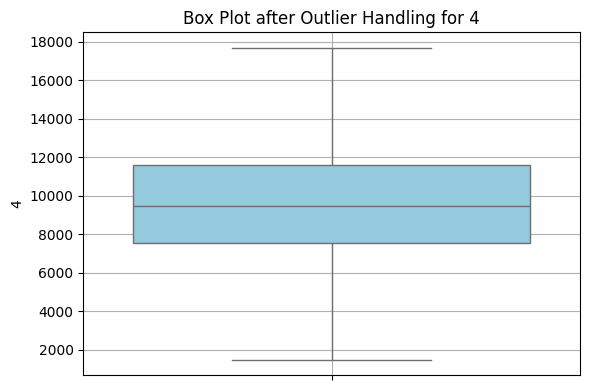

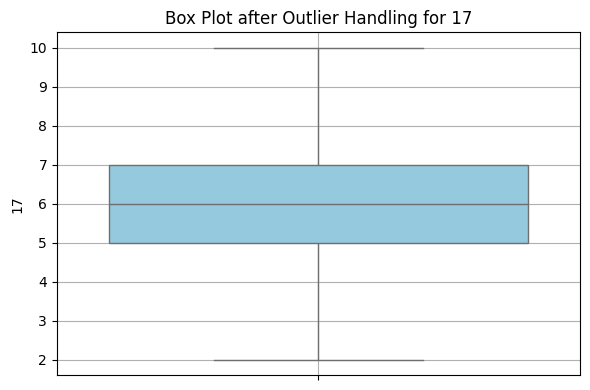

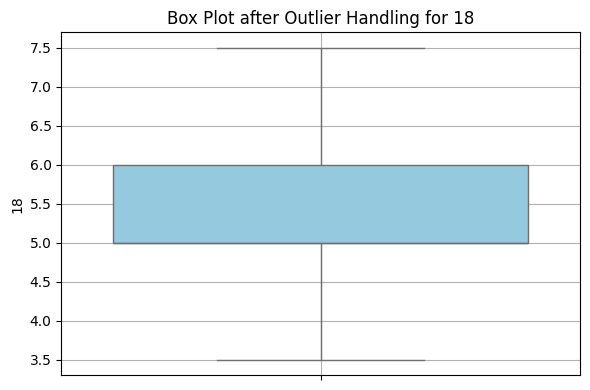

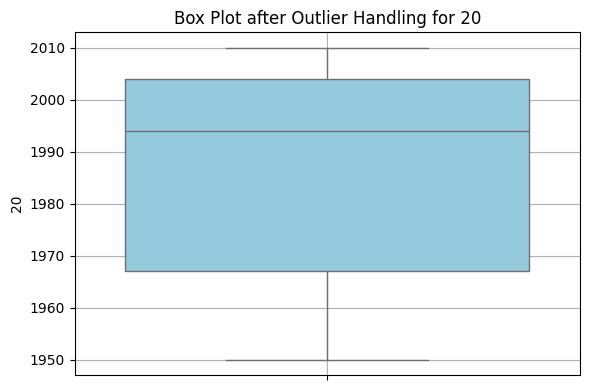

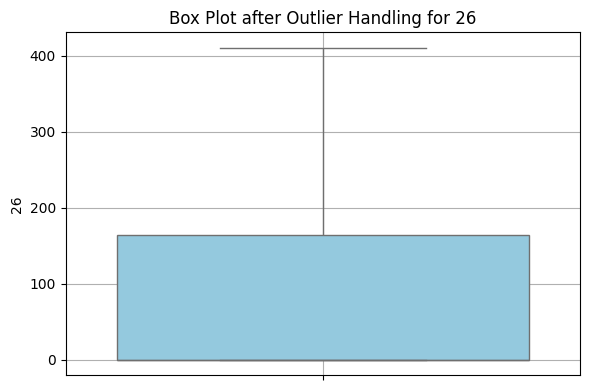

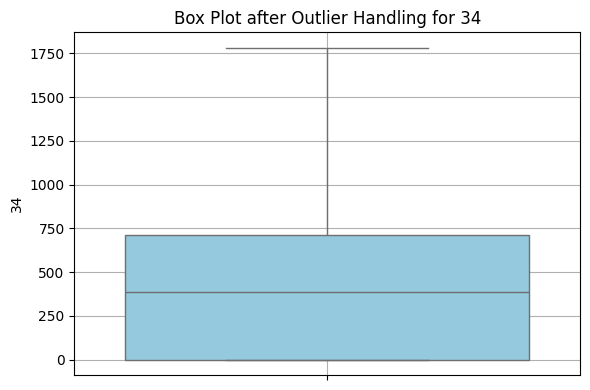

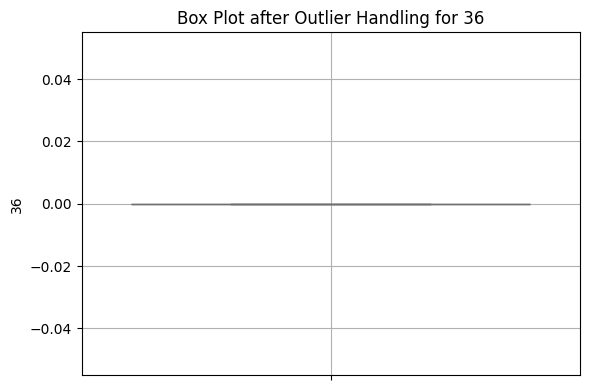

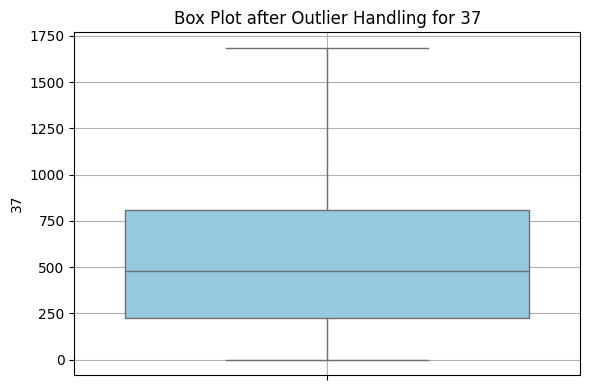

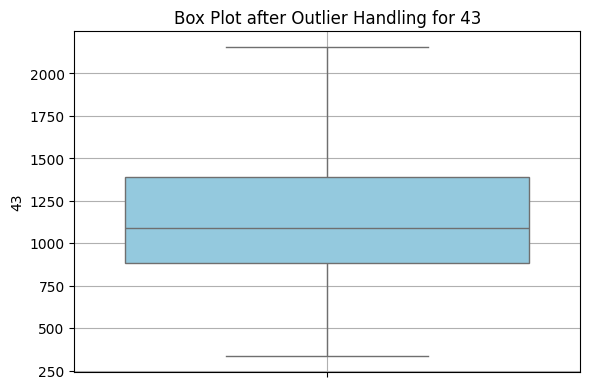

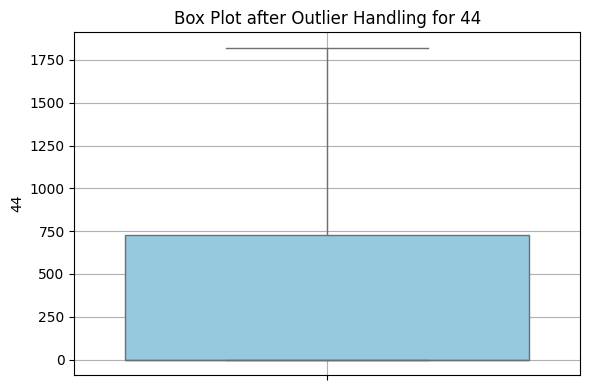

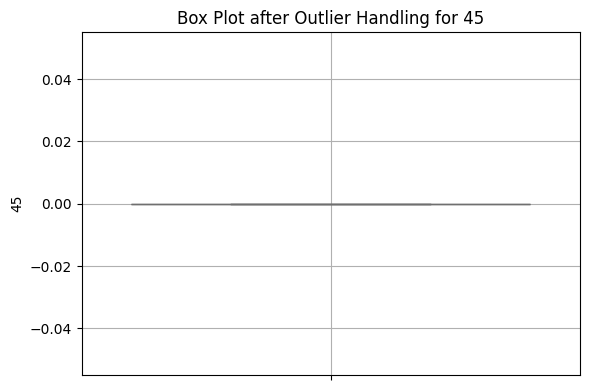

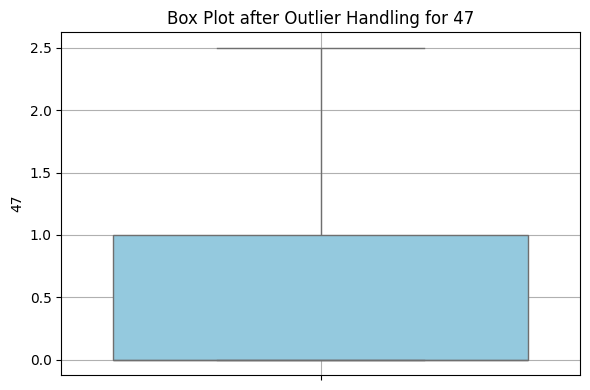

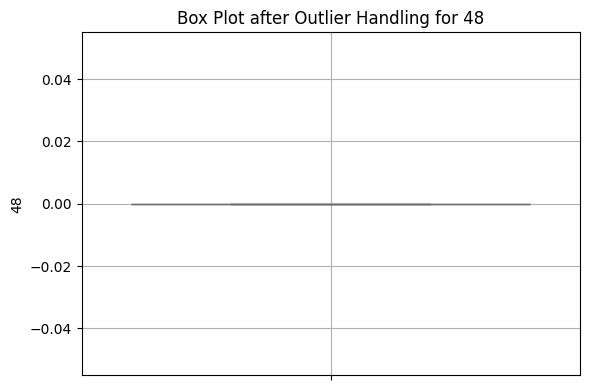

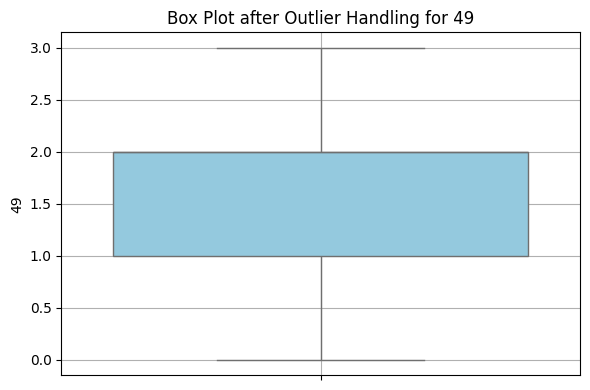

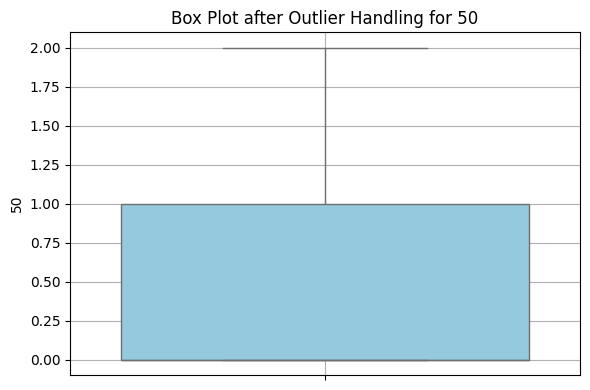

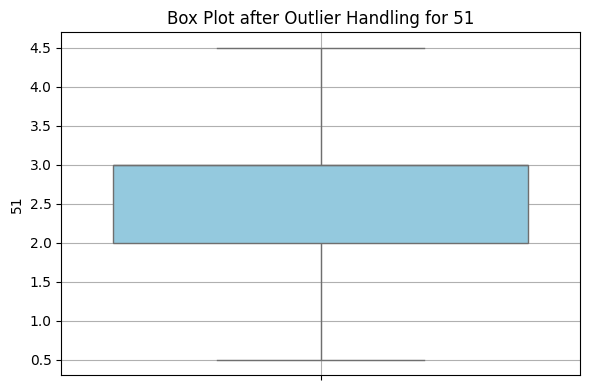

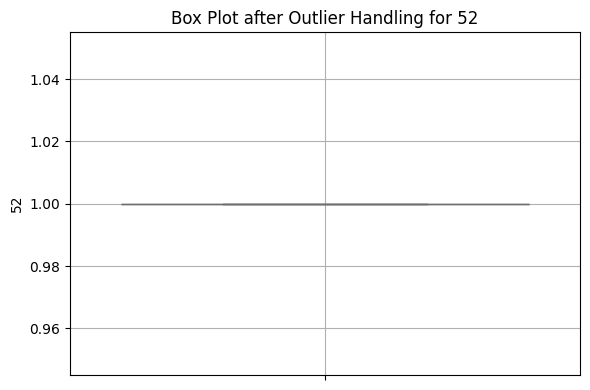

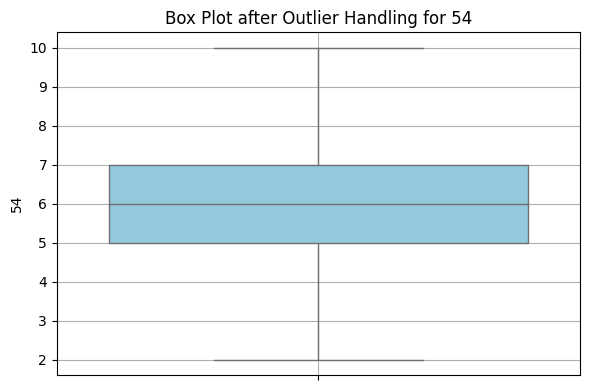

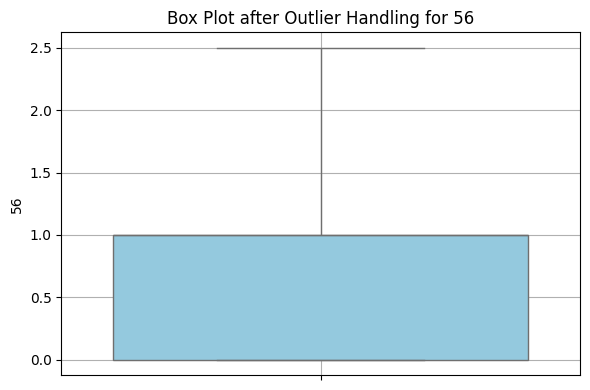

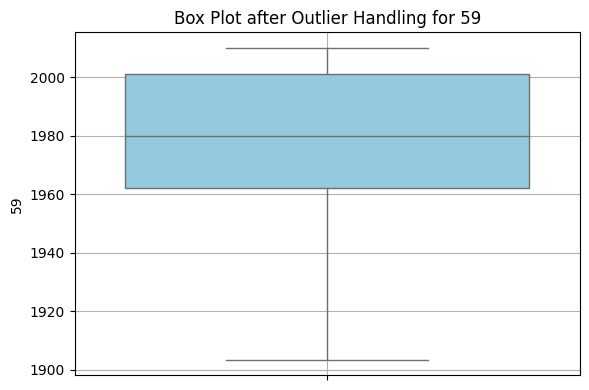

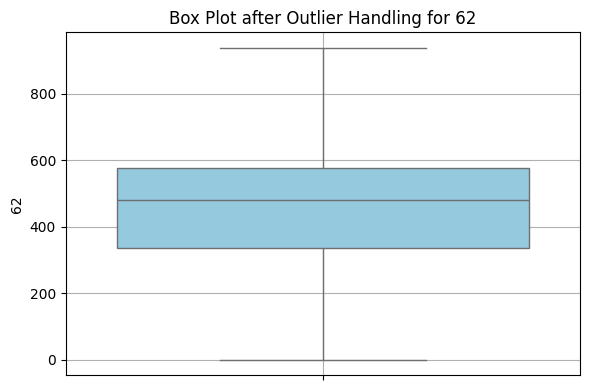

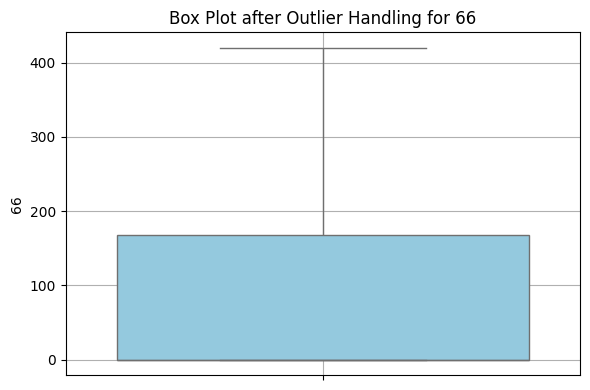

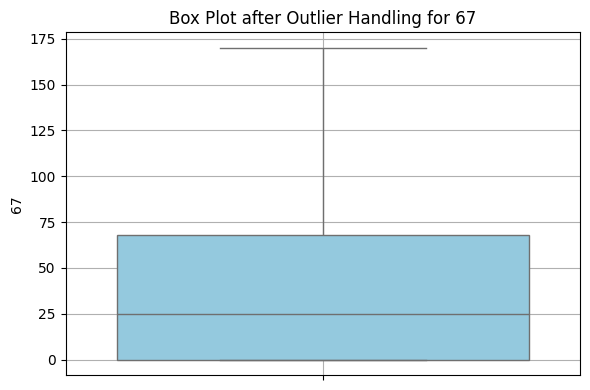

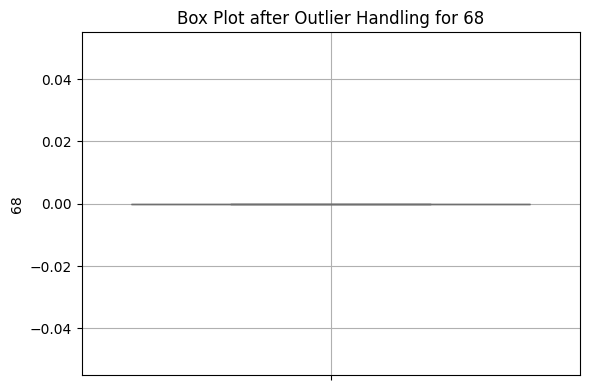

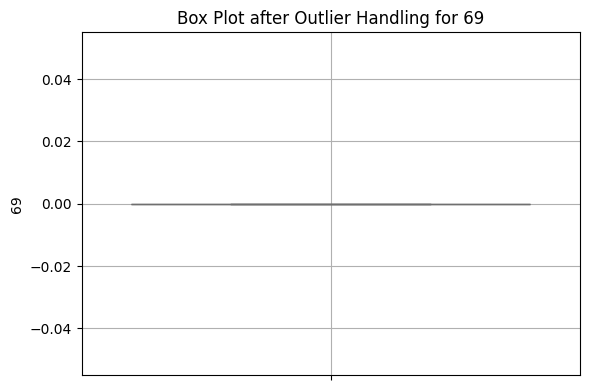

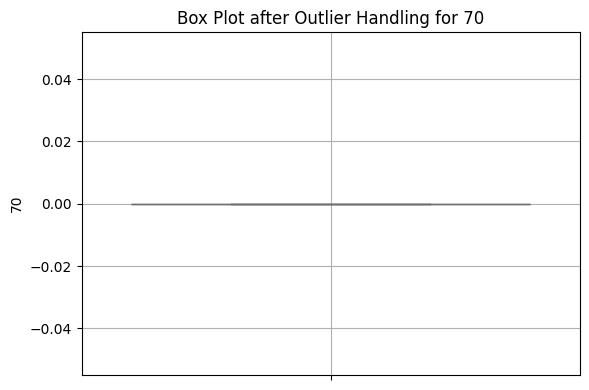

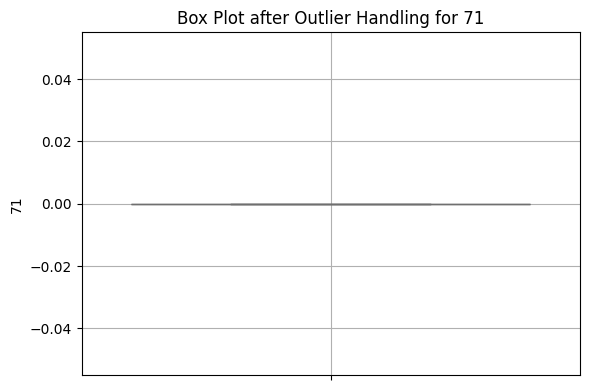

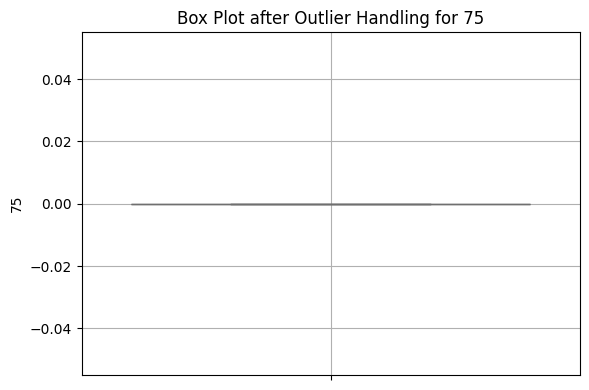

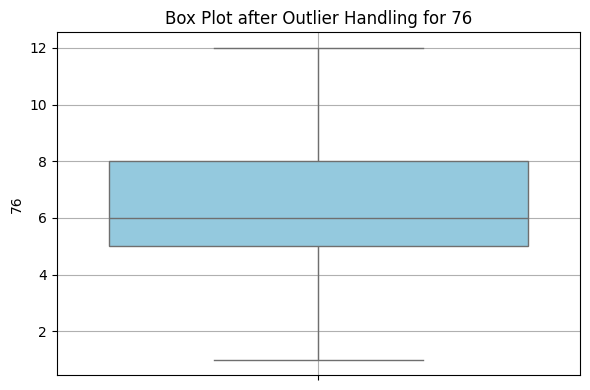

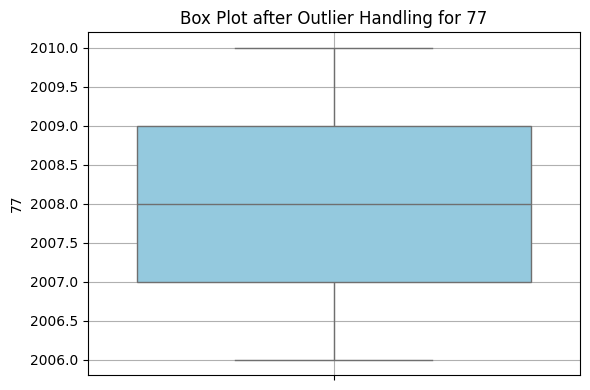

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot after Outlier Handling for {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [18]:
X = df.drop(columns=[80])

y = df[80]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (1460, 66)
y shape: (1460,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MSE: 1104410186.7916536
R² Score: 0.8560152258248395


In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print("\nPolynomial Regression (degree=2):")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))



Polynomial Regression (degree=2):
MSE: 12228402951.160055
R² Score: -0.5942480959547709


In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("\nLasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))



Lasso Regression:
MSE: 1104474486.258596
R² Score: 0.8560068429392613
